<a href="https://colab.research.google.com/github/WBruni/Analise_Vendas_e_Desempenho_Loja/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# <font color='green'>Análise de Dados Loja-1</font>

In [2]:
loja = loja.drop(['Vendedor', 'lat', 'lon'], axis=1)
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,SP,4,cartao_credito,8
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,RJ,1,cartao_credito,4
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,DF,1,cartao_credito,1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,RS,4,boleto,1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,MG,5,boleto,1


In [3]:
print(loja.columns)

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Local da compra', 'Avaliação da compra', 'Tipo de pagamento',
       'Quantidade de parcelas'],
      dtype='object')


## <font color='green'>Verificaçao de Valores Faltantes - Loja-1</font>

In [4]:
loja.isnull().sum()

,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Data da Compra,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


## <font color='green'>Tipos de Dados Incorretos - Loja-1</font>

In [5]:
loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Local da compra         2359 non-null   object 
 6   Avaliação da compra     2359 non-null   int64  
 7   Tipo de pagamento       2359 non-null   object 
 8   Quantidade de parcelas  2359 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 166.0+ KB


## <font color='green'>Conversão de Tipo de Dados - Loja-1</font>

In [6]:
loja['Data da Compra'] = pd.to_datetime(loja['Data da Compra'], format='%d/%m/%Y')
loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Produto                 2359 non-null   object        
 1   Categoria do Produto    2359 non-null   object        
 2   Preço                   2359 non-null   float64       
 3   Frete                   2359 non-null   float64       
 4   Data da Compra          2359 non-null   datetime64[ns]
 5   Local da compra         2359 non-null   object        
 6   Avaliação da compra     2359 non-null   int64         
 7   Tipo de pagamento       2359 non-null   object        
 8   Quantidade de parcelas  2359 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 166.0+ KB


## <font color='green'>Consistência em Colunas Categóricas - Loja-1</font>

In [7]:
loja['Produto'].unique()

array(['Assistente virtual', 'Mesa de jantar', 'Jogo de tabuleiro',
       'Micro-ondas', 'Cadeira de escritório', 'Blocos de montar',
       'Boneca bebê', 'Lava louças', 'Lavadora de roupas',
       'Carrinho controle remoto', 'Geladeira', 'Fone de ouvido',
       'Panela de pressão', 'Bicicleta', 'Ciência de dados com python',
       'Bola de vôlei', 'Xadrez de madeira', 'TV Led UHD 4K',
       'Copo térmico', 'Kit banquetas', 'Dashboards com Power BI',
       'Faqueiro', 'Jogo de panelas', 'Bateria', 'Corda de pular',
       'Fogão', 'Cama box', 'Impressora', 'Cômoda', 'Guarda roupas',
       'Dinossauro Rex', 'Guitarra', 'Secadora de roupas',
       'Sofá retrátil', 'Tablet ABXY', 'Cubo mágico 8x8', 'Jogo de copos',
       'Modelagem preditiva', 'Celular Plus X42', 'Mochila',
       'Bola de basquete', 'Headset', 'Poltrona', 'Violão',
       'Iniciando em programação', 'Celular ABXY', 'Smartwatch',
       'Mesa de centro', 'Cama king', 'Smart TV', 'Pandeiro'],
      dtype=object)

In [8]:
loja['Categoria do Produto'].unique()

array(['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos',
       'utilidades domesticas', 'esporte e lazer', 'livros',
       'instrumentos musicais'], dtype=object)

In [9]:
loja['Local da compra'].unique()

array(['SP', 'RJ', 'DF', 'RS', 'MG', 'CE', 'ES', 'BA', 'TO', 'PR', 'AP',
       'GO', 'AL', 'PI', 'PE', 'AM', 'RN', 'PA', 'PB', 'SC', 'SE', 'MT',
       'MS', 'RO', 'MA', 'AC'], dtype=object)

In [10]:
loja['Tipo de pagamento'].unique()

array(['cartao_credito', 'boleto', 'cupom', 'cartao_debito'], dtype=object)

## <font color='green'>Verificaçao de Valores Duplicados - Loja-1</font>

In [11]:
loja.duplicated().sum()

np.int64(0)

## <font color='green'>Valores Atípicos ou Valores Irreais - Loja-1</font>

In [12]:
colunas_numericas = ['Preço', 'Frete', 'Quantidade de parcelas', 'Avaliação da compra']

print(loja[colunas_numericas].describe())

             Preço        Frete  Quantidade de parcelas  Avaliação da compra
count  2359.000000  2359.000000             2359.000000          2359.000000
mean    650.491361    34.691805                2.943196             3.976685
std     819.582778    43.814183                2.819897             1.415370
min      10.070000     0.000000                1.000000             1.000000
25%      74.345000     4.141783                1.000000             3.000000
50%     313.750000    16.498835                1.000000             5.000000
75%     904.130000    48.050074                4.000000             5.000000
max    3969.380000   214.377060               24.000000             5.000000


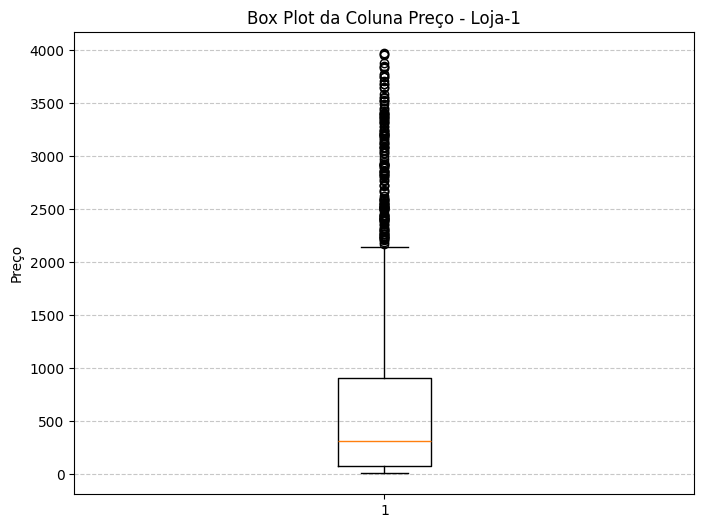

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6)) # Define o tamanho da figura para melhor visualização
plt.boxplot(loja['Preço'])
plt.title('Box Plot da Coluna Preço - Loja-1')
plt.ylabel('Preço')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona um grid leve
plt.show()

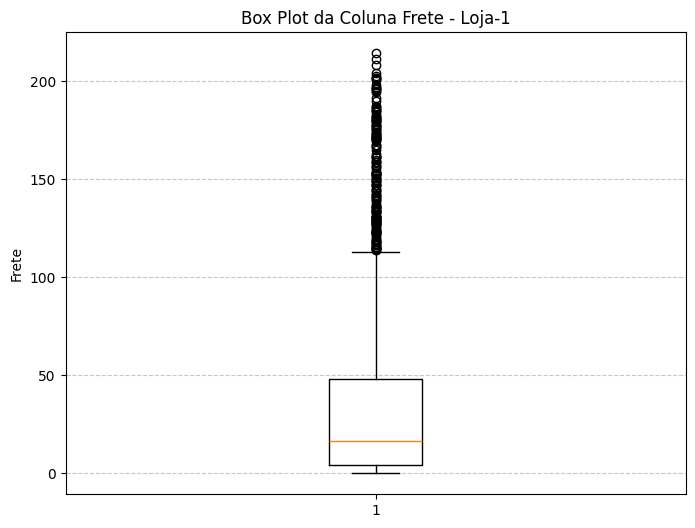

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja['Frete']) # Mude aqui para 'Frete'
plt.title('Box Plot da Coluna Frete - Loja-1') # Mude o título
plt.ylabel('Frete') # Mude o rótulo do eixo Y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

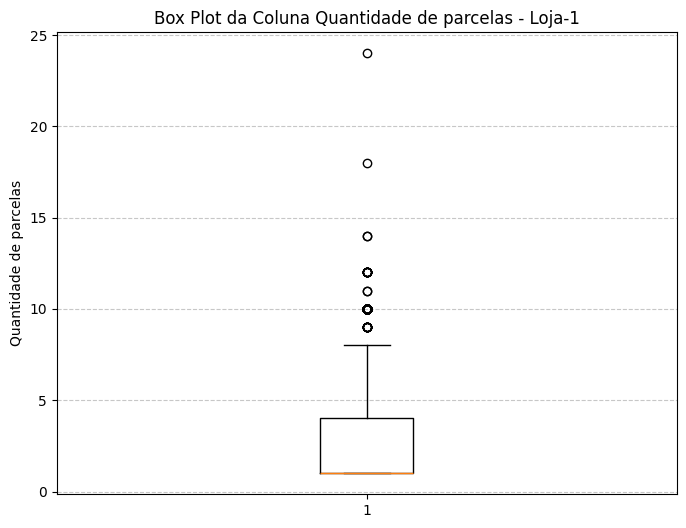

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(loja['Quantidade de parcelas']) # Mude aqui para 'Quantidade de parcelas'
plt.title('Box Plot da Coluna Quantidade de parcelas - Loja-1') # Mude o título
plt.ylabel('Quantidade de parcelas') # Mude o rótulo do eixo Y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## <font color='green'>Investigando registros com Frete igual a zero na Loja-1</font>

In [16]:
frete_zero_loja1 = loja[loja['Frete'] == 0]
display(frete_zero_loja1)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas
5,Blocos de montar,brinquedos,32.26,0.0,2020-12-03,RS,5,cupom,1
6,Boneca bebê,brinquedos,58.90,0.0,2021-08-07,SP,3,boleto,1
24,Dashboards com Power BI,livros,44.69,0.0,2023-02-14,MG,5,cartao_credito,2
54,Cubo mágico 8x8,brinquedos,22.86,0.0,2021-09-03,RJ,4,boleto,1
60,Corda de pular,esporte e lazer,17.11,0.0,2021-09-25,AL,3,cartao_credito,5
...,...,...,...,...,...,...,...,...,...
2339,Headset,eletronicos,63.95,0.0,2022-03-24,SP,5,cartao_credito,5
2341,Jogo de copos,utilidades domesticas,43.49,0.0,2020-05-28,SP,1,cartao_credito,1
2348,Copo térmico,esporte e lazer,37.76,0.0,2020-03-25,SP,5,cartao_credito,1
2349,Faqueiro,utilidades domesticas,47.63,0.0,2020-06-29,MG,4,boleto,1


In [20]:
frete_por_categoria = frete_zero_loja1['Categoria do Produto'].value_counts()
frete_por_categoria.name = 'Frequência'
print("Categorias de produto com frete zero:")
display(frete_por_categoria)

Categorias de produto com frete zero:


,Frequência
Categoria do Produto,
brinquedos,97
esporte e lazer,39
livros,35
utilidades domesticas,29
instrumentos musicais,6
eletronicos,3


In [21]:
locais_com_frete_zero = frete_zero_loja1['Local da compra'].value_counts()
locais_com_frete_zero.name = 'Frequência'
print("Locais de compra com frete zero:")
display(locais_com_frete_zero)

Locais de compra com frete zero:


,Frequência
Local da compra,
SP,88
RJ,30
MG,19
SC,13
PR,13
RS,11
BA,9
DF,5
ES,4


In [22]:
tipos_pagamento_com_frete_zero = frete_zero_loja1['Tipo de pagamento'].value_counts()
tipos_pagamento_com_frete_zero.name = 'Frequência'
print("Tipos de pagamento com frete zero:")
display(tipos_pagamento_com_frete_zero)

Tipos de pagamento com frete zero:


,Frequência
Tipo de pagamento,
cartao_credito,144
boleto,47
cupom,15
cartao_debito,3


##<font color='green'> Descobertas sobre Registros com Frete Zero - Loja-1</font>

Com base na análise dos registros onde o frete foi zero na Loja 1, observamos o seguinte:

*   **Categorias de Produto:**
    *   brinquedos (97 registros)
    *   esporte e lazer (39 registros)
    *   livros (35 registros)
*   **Locais de Compra:**
    *   SP (88 registros)
    *   RJ (30 registros)
    *   MG (19 registros)
*   **Tipos de Pagamento:**
    *   cartão de crédito (144 registros)
    *   boleto (47 registros)
    *   cupom (15 registros)

Essas observações sugerem que o frete zero na Loja-1 pode estar mais relacionado a certas categorias de produtos (principalmente **brinquedos**, itens de **esporte e lazer** e **livros**), concentrado em alguns estados e frequentemente utilizado em pagamentos com **cartão de crédito**.

#1. Análise do faturamento



# 2. Vendas por Categoria

# 3. Média de Avaliação das Lojas


# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja